In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
sns.set()

In [2]:
with open('./kinopoisk/stop-words-russian.txt', encoding='utf-8') as f:
    my_stop_words = f.read().splitlines()

my_stop_words = set(filter(lambda x: len(x) > 1, (stemmer.stem(w) for w in my_stop_words)))
print(my_stop_words)

def preprocess(t):
    t = re.sub("[^А-Яа-я]", " ", t.lower())
    return list(filter(lambda x: len(x) > 1 and x not in my_stop_words, (stemmer.stem(w) for w in t.split())))

{'двенадцат', 'тог', 'пор', 'скольк', 'четыр', 'лиш', 'всем', 'нич', 'теб', 'посл', 'люд', 'мен', 'алл', 'через', 'там', 'такж', 'когд', 'нас', 'девятнадца', 'всегд', 'раз', 'сих', 'непрерывн', 'наконец', 'вас', 'вы', 'нам', 'миллион', 'под', 'совс', 'мо', 'ты', 'стал', 'чащ', 'жизн', 'процент', 'моч', 'опя', 'ве', 'раньш', 'почт', 'окол', 'буд', 'сегодн', 'быт', 'сут', 'однажд', 'двенадца', 'есл', 'ни', 'восемнадцат', 'мног', 'нельз', 'десят', 'лучш', 'деся', 'тогд', 'тольк', 'наибол', 'тем', 'чут', 'лет', 'том', 'мог', 'них', 'ден', 'никуд', 'четверт', 'кажет', 'мы', 'недалек', 'довольн', 'может', 'пожалуйст', 'ран', 'вам', 'ещ', 'седьм', 'ли', 'нет', 'пот', 'важн', 'дел', 'ну', 'ест', 'спасиб', 'впроч', 'трет', 'межд', 'без', 'вон', 'нх', 'при', 'прот', 'иногд', 'котор', 'восемнадца', 'уж', 'где', 'из', 'тринадцат', 'все', 'две', 'ег', 'дальш', 'мел', 'кром', 'двух', 'ил', 'нег', 'обычн', 'но', 'мно', 'быва', 'кажд', 'одн', 'тот', 'их', 'снов', 'дар', 'им', 'пят', 'нибуд', 'близк', 

In [3]:
preprocess('шла саша по шоссе в две тысячи девятнадцатом году туда куда нельзя ходить')

['шла', 'саш', 'шосс', 'ход']

In [4]:
dfs = {}
for f in ['good', 'bad', 'neutral']:
    df = pd.read_csv('./kinopoisk/' + f + '.tsv', sep='\t')
    df['date'] = pd.to_datetime(df['date'])
    df.loc[df['title'].isna(), 'title'] = ""
    df.loc[df['score']==0, 'score'] = None
    df.loc[df['score']>10,'score'] = 10
    dfs[f] = df
    df['stems'] = (df['title'] + " " + df['text']).apply(preprocess)
df = pd.concat(dfs).reset_index().drop(columns=['level_1', 'Unnamed: 0']).rename(columns={'level_0':'cat'})
print(df.shape)
df.head()

(2467, 9)


,cat,date,movie_title,not_useful,score,text,title,useful,stems
0,bad,2019-04-06 09:35:00,Любовный треугольник,0,4.0,"В жизни, как в темной чаще, Каждый чуть-чуть п...",Корявым почерком о высоких отношениях,1,"[коряв, почерк, высок, отношен, темн, пропа, з..."
1,bad,2019-04-06 03:00:00,Покидая Неверленд,0,NaN,"Если бы правила «Кинопоиска» позволяли это, я ...",,3,"[прав, кинопоиск, позволя, наверн, огранич, фр..."
2,bad,2019-04-06 00:50:00,Я худею,0,4.0,Полгода назад я наблюдал громогласный конфликт...,Я худею от нашего кино,0,"[худ, кин, полгод, наблюда, громогласн, конфли..."
3,bad,2019-04-05 23:38:00,Кладбище домашних животных,18,2.0,Культовый роман Стивена Кинга «Кладбище домашн...,"На словах крутой ремейк, а на деле скучный фейк",11,"[слов, крут, ремейк, скучн, фейк, культов, ром..."
4,bad,2019-04-05 20:08:00,Завтрак у Тиффани,2,2.0,Классика американского кинематографа Сейчас в...,,0,"[классик, американск, кинематограф, век, зрите..."


In [5]:
cat = df['cat']

In [6]:
df = pd.get_dummies(df, columns=['cat']).join(cat)
df.head()

,date,movie_title,not_useful,score,text,title,useful,stems,cat_bad,cat_good,cat_neutral,cat
0,2019-04-06 09:35:00,Любовный треугольник,0,4.0,"В жизни, как в темной чаще, Каждый чуть-чуть п...",Корявым почерком о высоких отношениях,1,"[коряв, почерк, высок, отношен, темн, пропа, з...",1,0,0,bad
1,2019-04-06 03:00:00,Покидая Неверленд,0,NaN,"Если бы правила «Кинопоиска» позволяли это, я ...",,3,"[прав, кинопоиск, позволя, наверн, огранич, фр...",1,0,0,bad
2,2019-04-06 00:50:00,Я худею,0,4.0,Полгода назад я наблюдал громогласный конфликт...,Я худею от нашего кино,0,"[худ, кин, полгод, наблюда, громогласн, конфли...",1,0,0,bad
3,2019-04-05 23:38:00,Кладбище домашних животных,18,2.0,Культовый роман Стивена Кинга «Кладбище домашн...,"На словах крутой ремейк, а на деле скучный фейк",11,"[слов, крут, ремейк, скучн, фейк, культов, ром...",1,0,0,bad
4,2019-04-05 20:08:00,Завтрак у Тиффани,2,2.0,Классика американского кинематографа Сейчас в...,,0,"[классик, американск, кинематограф, век, зрите...",1,0,0,bad


In [7]:
df.to_pickle('./kinopoisk/dfall.pkl')

In [8]:
mindate = pd.DataFrame(df.groupby('movie_title')['date'].min())
df['mindate'] = mindate.loc[df['movie_title']].reset_index()['date']
df['days'] = (df['date'] - df['mindate']) / np.timedelta64(1,'D')
df.head()

,date,movie_title,not_useful,score,text,title,useful,stems,cat_bad,cat_good,cat_neutral,cat,mindate,days
0,2019-04-06 09:35:00,Любовный треугольник,0,4.0,"В жизни, как в темной чаще, Каждый чуть-чуть п...",Корявым почерком о высоких отношениях,1,"[коряв, почерк, высок, отношен, темн, пропа, з...",1,0,0,bad,2019-04-06 09:35:00,0.000000
1,2019-04-06 03:00:00,Покидая Неверленд,0,NaN,"Если бы правила «Кинопоиска» позволяли это, я ...",,3,"[прав, кинопоиск, позволя, наверн, огранич, фр...",1,0,0,bad,2019-03-12 10:11:00,24.700694
2,2019-04-06 00:50:00,Я худею,0,4.0,Полгода назад я наблюдал громогласный конфликт...,Я худею от нашего кино,0,"[худ, кин, полгод, наблюда, громогласн, конфли...",1,0,0,bad,2019-03-09 00:59:00,27.993750
3,2019-04-05 23:38:00,Кладбище домашних животных,18,2.0,Культовый роман Стивена Кинга «Кладбище домашн...,"На словах крутой ремейк, а на деле скучный фейк",11,"[слов, крут, ремейк, скучн, фейк, культов, ром...",1,0,0,bad,2019-04-03 03:34:00,2.836111
4,2019-04-05 20:08:00,Завтрак у Тиффани,2,2.0,Классика американского кинематографа Сейчас в...,,0,"[классик, американск, кинематограф, век, зрите...",1,0,0,bad,2019-04-05 20:08:00,0.000000


In [9]:
dfv =  pd.read_csv('./kinopoisk/viking.tsv', sep='\t')
dfv['date'] = pd.to_datetime(dfv['date'])
dfv.loc[dfv['title'].isna(), 'title'] = ""
dfv.loc[dfv['score']==0, 'score'] = None
dfv.loc[dfv['score']>10,'score'] = 10
dfv['stems'] = (dfv['title'] + " " + dfv['text']).apply(preprocess)
dfv.drop(columns='Unnamed: 0', inplace=True)
dfv.head()

,cat,date,movie_title,not_useful,score,text,title,useful,stems
0,bad,2016-12-30 04:59:00,Викинг,351,5.0,Российское кино... Удивительный феномен. Имея ...,Много шума из ничего.,693,"[шум, российск, кин, удивительн, феном, име, б..."
1,bad,2017-01-06 15:58:00,Викинг,56,NaN,"X век, Киевская Русь, в Киеве правит князь Яро...",Пафос,321,"[пафос, век, киевск, ру, киев, прав, княз, яро..."
2,bad,2016-12-31 14:31:00,Викинг,314,3.0,"Признаюсь, после второго трейлера к 'Викингу' ...",Из грязи в князи.,619,"[гряз, княз, призна, трейлер, викинг, голов, з..."
3,bad,2017-01-07 18:37:00,Викинг,65,1.0,"Хочу предупредить об опасности, которую несёт ...",Не было викинга!,301,"[викинг, хоч, предупред, опасн, нес, фильм, вз..."
4,bad,2016-12-30 04:36:00,Викинг,353,NaN,Такого названия фильм не заслуживает чисто экз...,"Как современное русское кино не назови, все ра...",587,"[современ, русск, кин, назов, равн, поплывет, ..."


In [10]:
mindate = pd.DataFrame(dfv.groupby('movie_title')['date'].min())
dfv['mindate'] = mindate.loc[dfv['movie_title']].reset_index()['date']
dfv['days'] = (dfv['date'] - dfv['mindate']) / np.timedelta64(1,'D')
dfv.head()

,cat,date,movie_title,not_useful,score,text,title,useful,stems,mindate,days
0,bad,2016-12-30 04:59:00,Викинг,351,5.0,Российское кино... Удивительный феномен. Имея ...,Много шума из ничего.,693,"[шум, российск, кин, удивительн, феном, име, б...",2016-12-28 02:22:00,2.109028
1,bad,2017-01-06 15:58:00,Викинг,56,NaN,"X век, Киевская Русь, в Киеве правит князь Яро...",Пафос,321,"[пафос, век, киевск, ру, киев, прав, княз, яро...",2016-12-28 02:22:00,9.566667
2,bad,2016-12-31 14:31:00,Викинг,314,3.0,"Признаюсь, после второго трейлера к 'Викингу' ...",Из грязи в князи.,619,"[гряз, княз, призна, трейлер, викинг, голов, з...",2016-12-28 02:22:00,3.506250
3,bad,2017-01-07 18:37:00,Викинг,65,1.0,"Хочу предупредить об опасности, которую несёт ...",Не было викинга!,301,"[викинг, хоч, предупред, опасн, нес, фильм, вз...",2016-12-28 02:22:00,10.677083
4,bad,2016-12-30 04:36:00,Викинг,353,NaN,Такого названия фильм не заслуживает чисто экз...,"Как современное русское кино не назови, все ра...",587,"[современ, русск, кин, назов, равн, поплывет, ...",2016-12-28 02:22:00,2.093056


In [11]:
dfv['date'].min()

Timestamp('2016-12-28 02:22:00')

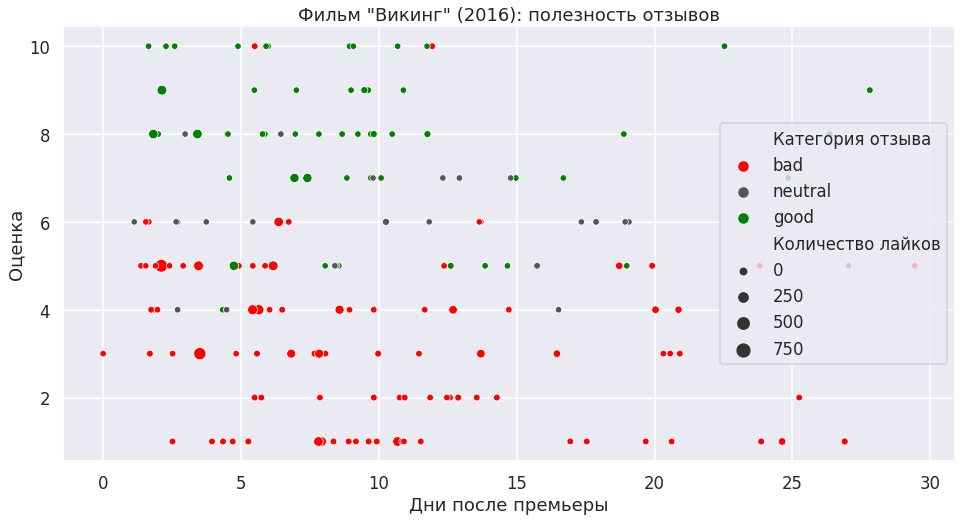

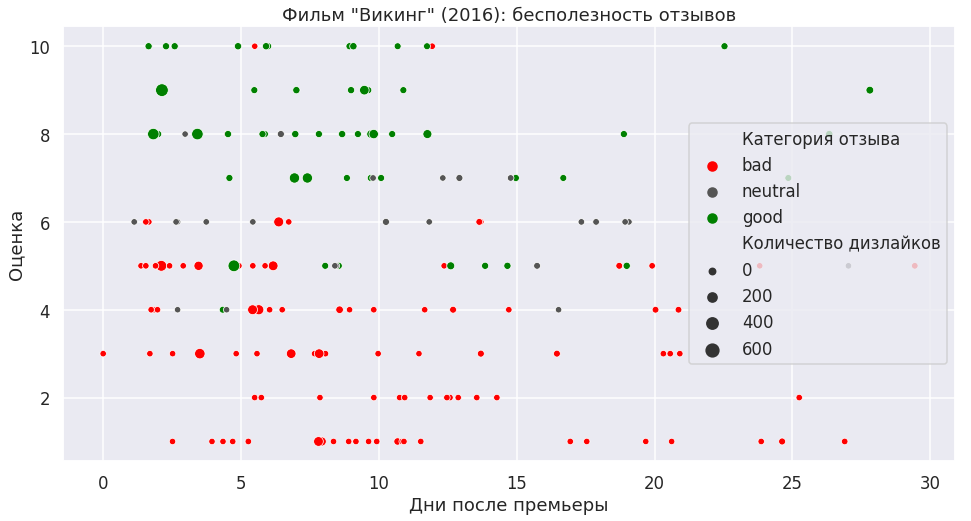

In [12]:
sns.set_context('talk')
plt.figure(figsize=(16, 8))
g = sns.scatterplot(data=dfv.query('days<=30'), x='days', y='score', hue='cat', 
                palette=sns.color_palette(['red', '#555555', 'green']), size='useful')
plt.title('Фильм "Викинг" (2016): полезность отзывов')
plt.xlabel('Дни после премьеры')
plt.ylabel('Оценка')
g.legend_.texts[0].set_text('Категория отзыва')
g.legend_.texts[4].set_text('Количество лайков')
plt.show()

plt.figure(figsize=(16, 8))
g = sns.scatterplot(data=dfv.query('days<=30'), x='days', y='score', hue='cat', 
                palette=sns.color_palette(['red', '#555555', 'green']), size='not_useful')
plt.title('Фильм "Викинг" (2016): бесполезность отзывов')
plt.xlabel('Дни после премьеры')
plt.ylabel('Оценка')
g.legend_.texts[0].set_text('Категория отзыва')
g.legend_.texts[4].set_text('Количество дизлайков')
plt.show()

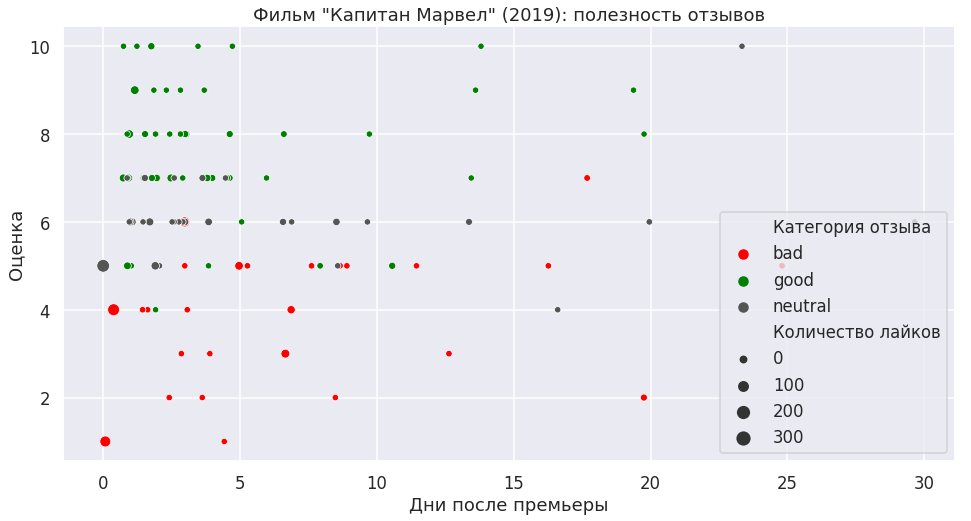

In [13]:
plt.figure(figsize=(16, 8))
g = sns.scatterplot(data=df.query('movie_title=="Капитан Марвел"'), x='days', y='score', hue='cat', 
                palette=sns.color_palette(['red', 'green', '#555555' ]), size='useful')
plt.title('Фильм "Капитан Марвел" (2019): полезность отзывов')
plt.xlabel('Дни после премьеры')
plt.ylabel('Оценка')
g.legend_.texts[0].set_text('Категория отзыва')
g.legend_.texts[4].set_text('Количество лайков')
plt.show()

In [14]:
all_words = dict(Counter(df['stems'].sum()))
print('Общее количество слов:     ', len(all_words))

Общее количество слов:      36297


In [15]:
vocab = {w:cnt for w, cnt in all_words.items() if cnt >= 2}
print('Количество отобранных слов:', len(vocab))

Количество отобранных слов: 22084


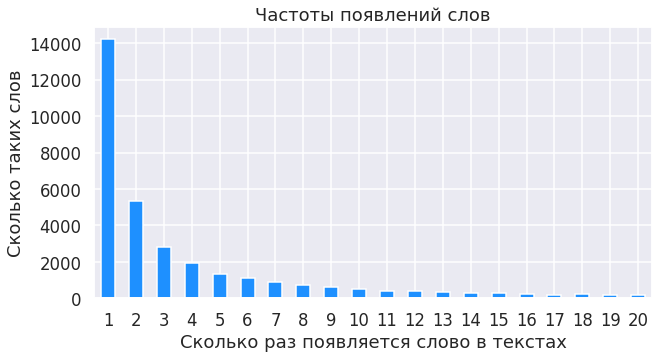

In [16]:
sns.set_context('talk')
freq = pd.Series(list(all_words.values()))
freq[freq <= 20].value_counts().sort_index().plot('bar', rot=0, color='dodgerblue', figsize=(10, 5))
plt.title('Частоты появлений слов')
plt.xlabel('Сколько раз появляется слово в текстах')
plt.ylabel('Сколько таких слов')
plt.show()

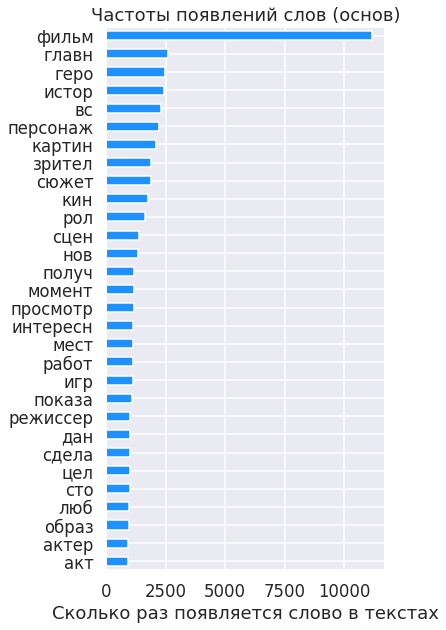

In [17]:
pd.Series(vocab).nlargest(30).sort_values().plot('barh', rot=0, color='dodgerblue', figsize=(5, 10))
plt.title('Частоты появлений слов (основ)')
plt.xlabel('Сколько раз появляется слово в текстах')
plt.show()

Text(0.5, 1.0, 'Распределение оценок в зависимости от категории отзыва')

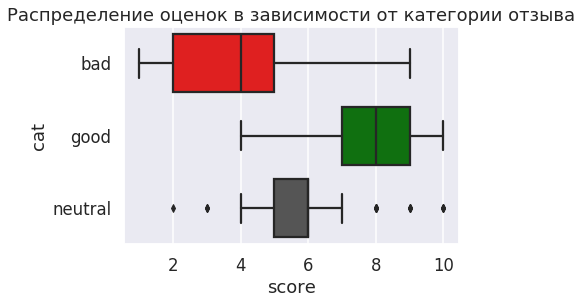

In [18]:
sns.boxplot(data=df, x='score', y='cat', palette=sns.color_palette(['red', 'green', '#555555' ]))
plt.title('Распределение оценок в зависимости от категории отзыва')

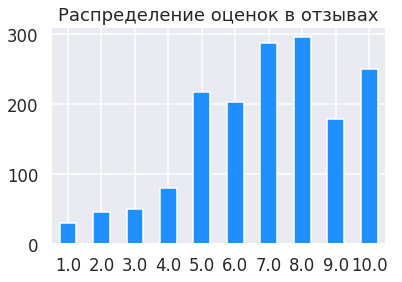

In [19]:
df.query('score>0')['score'].value_counts().sort_index().plot('bar', rot=False, color='dodgerblue')
plt.title('Распределение оценок в отзывах')
plt.show()

In [20]:
df['len'] = df['stems'].apply(len)

In [193]:
df.columns

Index(['date', 'movie_title', 'not_useful', 'score', 'text', 'title', 'useful',
       'stems', 'cat_bad', 'cat_good', 'cat_neutral', 'cat', 'mindate', 'days',
       'len'],
      dtype='object')

In [200]:
df[['score', 'not_useful', 'useful', 'days','len']].describe().rename(columns={'not_useful': '# дизлайков к отзыву', 
                              'score' : 'оценка из отзыва', 
                              'useful' : '# лайков к отзыву',
                                'days': 'дней с публикации первого отзыва', 'len':'длина отзыва в словах' })

,оценка из отзыва,# дизлайков к отзыву,# лайков к отзыву,дней с публикации первого отзыва,длина отзыва в словах
count,1642.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,6.943362,4.738549,4.987839,3.528746,216.088366
std,2.224967,19.078682,16.419649,6.131908,110.156677
min,1.000000,0.000000,0.000000,0.000000,32.000000
25%,5.000000,0.000000,0.000000,0.000000,134.000000
50%,7.000000,0.000000,1.000000,0.000000,190.000000
75%,9.000000,2.000000,3.000000,4.689583,269.000000
max,10.000000,497.000000,253.000000,29.876389,623.000000


Text(0, 0.5, '')

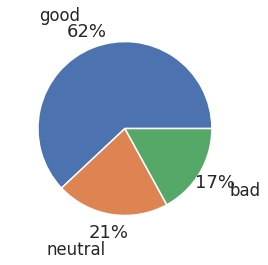

In [203]:
df['cat'].value_counts(normalize = True).round(2).plot('pie', autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.4)
plt.ylabel('')

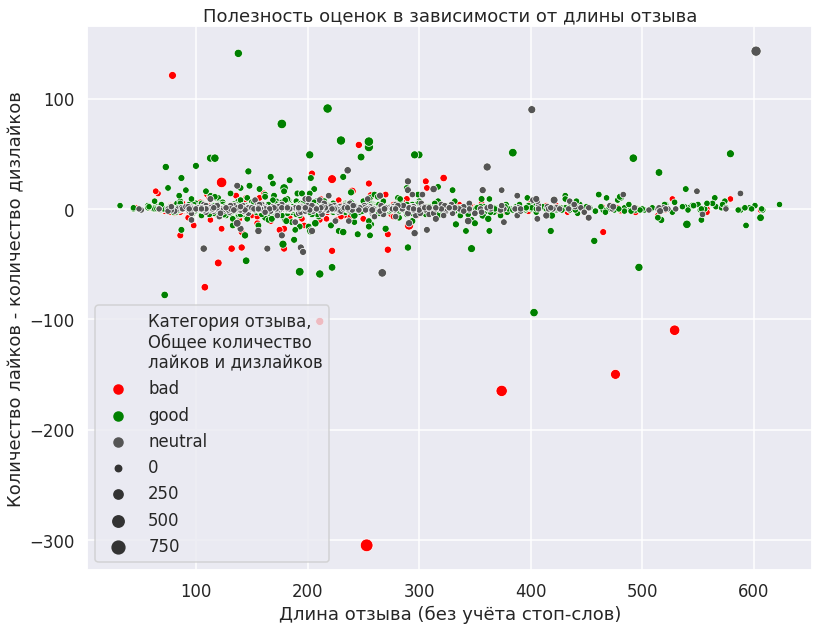

In [22]:
plt.figure(figsize=(13, 10))
g = sns.scatterplot(data=df, y=df['useful'] - df['not_useful'], x='len', hue='cat', size=df['useful'] + df['not_useful'], 
                    palette=sns.color_palette(['red', 'green', '#555555' ]))
plt.title('Полезность оценок в зависимости от длины отзыва')
plt.xlabel('Длина отзыва (без учёта стоп-слов)')
plt.ylabel('Количество лайков - количество дизлайков')
g.legend_.texts[0].set_text('Категория отзыва,\nОбщее количество\nлайков и дизлайков')
plt.show()

Text(0.5, 1.0, 'Фильмы, на которые написано больше всего отзывов')

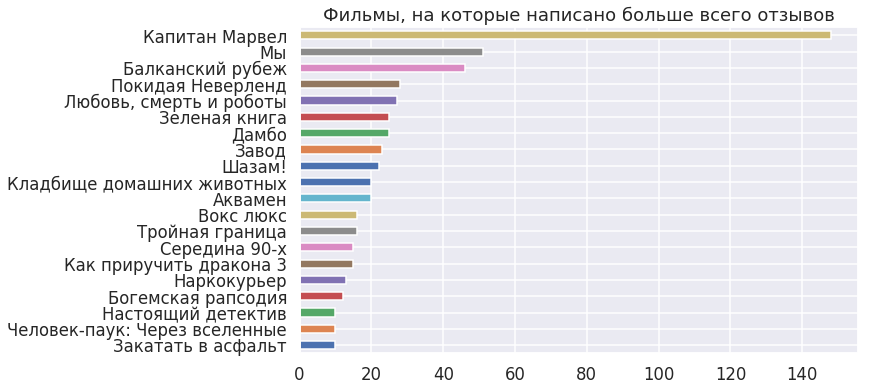

In [23]:
sns.set_context('talk')
df['movie_title'].value_counts().nlargest(20).sort_values().plot('barh', figsize=(10, 6))
plt.title('Фильмы, на которые написано больше всего отзывов')

## Tennis

In [24]:
dft = pd.read_table('./tennis/atp_matches_2015.csv.tsv',sep='\t')

In [25]:
dft.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2015-329,Tokyo,Hard,32,A,20151005,1,104527,1.0,NaN,...,1.0,2.0,2.0,71.0,46.0,33.0,10.0,10.0,2.0,5.0
1,2015-329,Tokyo,Hard,32,A,20151005,2,105147,NaN,WC,...,14.0,1.0,4.0,96.0,52.0,25.0,23.0,13.0,12.0,19.0
2,2015-329,Tokyo,Hard,32,A,20151005,3,105572,NaN,Q,...,7.0,15.0,7.0,128.0,74.0,60.0,27.0,18.0,9.0,11.0
3,2015-329,Tokyo,Hard,32,A,20151005,4,105311,NaN,NaN,...,6.0,9.0,5.0,85.0,42.0,27.0,21.0,13.0,4.0,8.0
4,2015-329,Tokyo,Hard,32,A,20151005,5,104468,3.0,NaN,...,6.0,0.0,5.0,61.0,33.0,24.0,10.0,10.0,1.0,5.0


In [26]:
dft.iloc[135]

tourney_id                      2015-422
tourney_name          Cincinnati Masters
surface                             Hard
draw_size                             56
tourney_level                          M
tourney_date                    20150816
match_num                             51
winner_id                         104918
winner_seed                            3
winner_entry                         NaN
winner_name                  Andy Murray
winner_hand                            R
winner_ht                            190
winner_ioc                           GBR
winner_age                       28.2574
winner_rank                            2
winner_rank_points                  8660
loser_id                          104755
loser_seed                            12
loser_entry                          NaN
loser_name               Richard Gasquet
loser_hand                             R
loser_ht                             185
loser_ioc                            FRA
loser_age       

In [27]:
dft['w_p_1stIn'] = dft['w_1stIn'] / dft['w_svpt']
dft['l_p_1stIn'] = dft['l_1stIn'] / dft['l_svpt']
dft['w_p_1stWon'] = dft['w_1stWon']  / dft['w_1stIn']
dft['l_p_1stWon'] = dft['l_1stWon']  / dft['l_1stIn']
dft['w_p_2ndWon'] = dft['w_2ndWon'] / (dft['w_svpt'] - dft['w_1stIn'])
dft['l_p_2ndWon'] = dft['l_2ndWon'] / (dft['l_svpt'] - dft['l_1stIn'])
dft['w_p_bpSaved'] = dft['w_bpSaved']  / dft['w_bpFaced']
dft['l_p_bpSaved'] = dft['l_bpSaved']  / dft['l_bpFaced']
dft['w_p_bpConverted'] = (dft['l_bpFaced'] - dft['l_bpSaved']) / dft['l_bpFaced']
dft['l_p_bpConverted'] = (dft['w_bpFaced'] - dft['w_bpSaved']) / dft['w_bpFaced']

In [28]:
dft.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'w_p_1stIn', 'l_p_1stIn', 'w_p_1stWon', 'l_p_1stWon',
       'w_p_2ndWon', 'l_p_2ndWon', 'w_p_bpSaved', 'l_p_bpSaved',
       'w_p_bpConverted', 'l_p_bpConverted'],
      dtype='object')

In [29]:
dft.describe().iloc[:,-10:]

,w_p_1stIn,l_p_1stIn,w_p_1stWon,l_p_1stWon,w_p_2ndWon,l_p_2ndWon,w_p_bpSaved,l_p_bpSaved,w_p_bpConverted,l_p_bpConverted
count,2620.000000,2620.000000,2620.000000,2619.000000,2618.000000,2619.000000,2347.000000,2608.000000,2608.000000,2347.000000
mean,0.617108,0.599534,0.776293,0.668957,0.573854,0.460700,0.677859,0.518544,0.481456,0.322141
std,0.079734,0.078158,0.078187,0.097477,0.103578,0.105001,0.276955,0.204048,0.204048,0.276955
min,0.153846,0.000000,0.533333,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.565217,0.545455,0.722222,0.612903,0.500000,0.394737,0.500000,0.400000,0.333333,0.111111
50%,0.617021,0.600000,0.777124,0.675000,0.566667,0.464286,0.714286,0.545455,0.454545,0.285714
75%,0.671233,0.653485,0.829787,0.733333,0.640000,0.529412,0.888889,0.666667,0.600000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


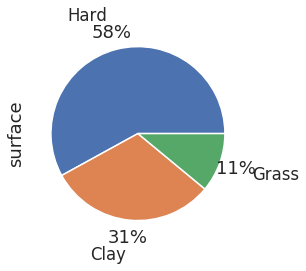

In [30]:
dft['surface'].value_counts(normalize = True).round(2).plot('pie', autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.4)

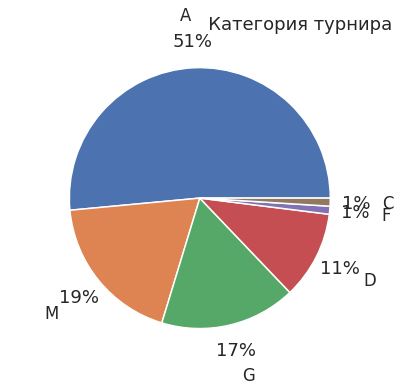

In [31]:
dft['tourney_level'].value_counts(normalize = True).round(2).plot('pie', autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.4,
                                                             figsize=(6,6))
plt.title('                                   Категория турнира')
plt.ylabel('')
plt.show()

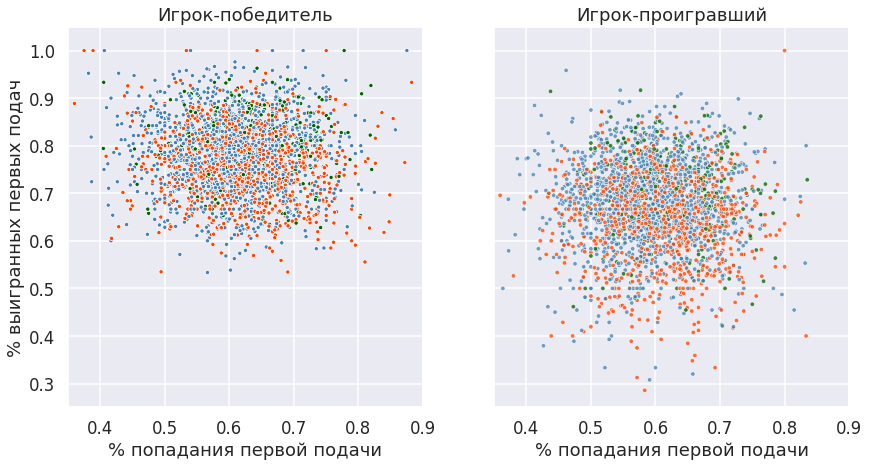

In [32]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
# plt.figure()
sns.scatterplot(data = dft, x='w_p_1stIn', y='w_p_1stWon', alpha=1, s=18, ax=ax[0], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
sns.scatterplot(data = dft, x='l_p_1stIn', y='l_p_1stWon', alpha=0.76, s=20, ax=ax[1], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
ax[0].set_xlim((0.35, 0.9))
ax[0].set_ylim((0.25, 1.05))
ax[0].set_xlabel('% попадания первой подачи')
ax[1].set_xlabel('% попадания первой подачи')
ax[0].set_ylabel('% выигранных первых подач')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

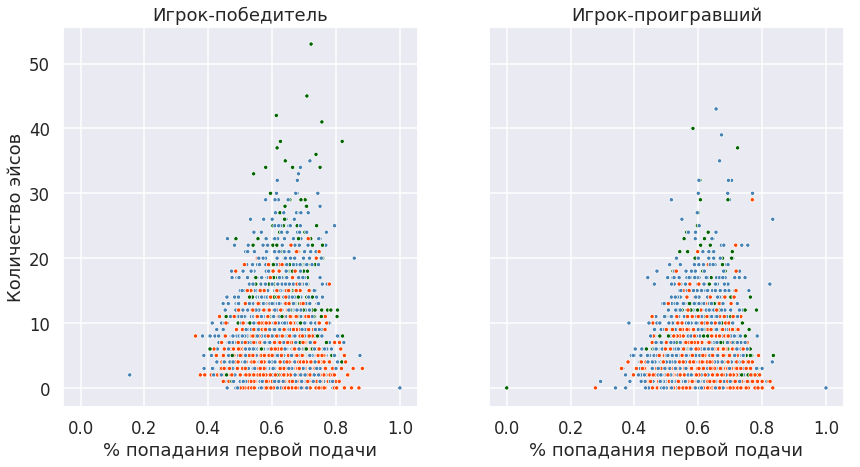

In [33]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
sns.scatterplot(data = dft, y='w_ace', x='w_p_1stIn', alpha=1, s=18, ax=ax[0], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
sns.scatterplot(data = dft, y='l_ace', x='l_p_1stIn', alpha=1, s=18, ax=ax[1], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
ax[0].set_xlabel('% попадания первой подачи')
ax[1].set_xlabel('% попадания первой подачи')
ax[0].set_ylabel('Количество эйсов')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

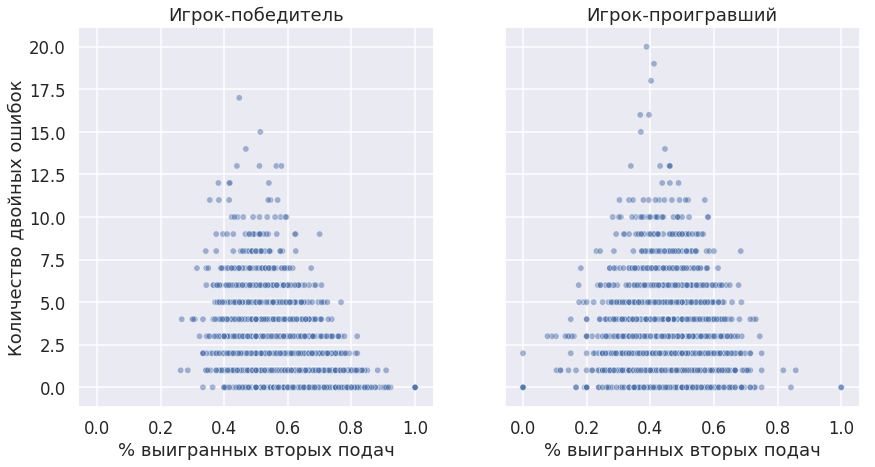

In [34]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
sns.scatterplot(data = dft, y='w_df', x='w_p_2ndWon', alpha=0.5, size=4, ax=ax[0], legend=False)
sns.scatterplot(data = dft, y='l_df', x='l_p_2ndWon', alpha=0.5, size=4, ax=ax[1], legend=False)
ax[0].set_xlabel('% выигранных вторых подач')
ax[1].set_xlabel('% выигранных вторых подач')
ax[0].set_ylabel('Количество двойных ошибок')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

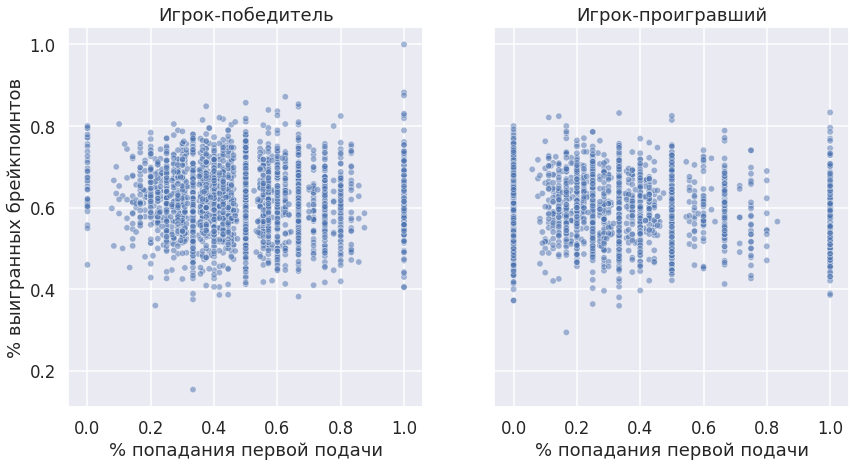

In [48]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
sns.scatterplot(data = dft, y='w_p_1stIn', x='w_p_bpConverted', alpha=0.5, size=4, ax=ax[0], legend=False)
sns.scatterplot(data = dft, y='l_p_1stIn', x='l_p_bpConverted', alpha=0.5, size=4, ax=ax[1], legend=False)
ax[0].set_xlabel('% попадания первой подачи')
ax[1].set_xlabel('% попадания первой подачи')
ax[0].set_ylabel('% выигранных брейкпоинтов')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

In [36]:
def count_tiebreaks(score):
    return re.sub(string=score, pattern="\(\d\)", repl="").count('7')

In [37]:
def count_sets(score):
    return score.count(' ')+1

In [38]:
dft['sets'] = dft['score'].apply(count_sets)
dft['tiebreaks'] = dft['score'].apply(count_tiebreaks)

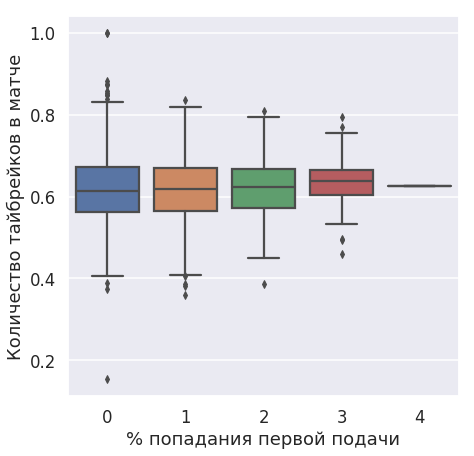

In [39]:
plt.figure(figsize=(7,7))
sns.boxplot(data = dft, y='w_p_1stIn', x='tiebreaks')
plt.xlabel('% попадания первой подачи')
plt.ylabel('Количество тайбрейков в матче')
plt.show()

In [40]:
both_seed = dft['winner_seed'].notna() & dft['loser_seed'].notna()

In [41]:
dft.loc[both_seed==True, 'tiebreaks'].value_counts() / dft.loc[both_seed==True, 'tiebreaks'].shape[0]

0    0.441989
1    0.372928
2    0.149171
3    0.035912
Name: tiebreaks, dtype: float64

In [42]:
dft.loc[both_seed==False, 'tiebreaks'].value_counts() / dft.loc[both_seed==False, 'tiebreaks'].shape[0]

0    0.475732
1    0.391757
2    0.115177
3    0.016179
4    0.001156
Name: tiebreaks, dtype: float64

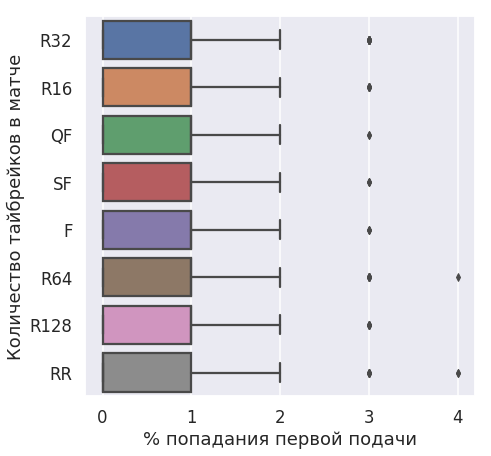

In [43]:
plt.figure(figsize=(7,7))
sns.boxplot(data = dft, y='round', x='tiebreaks')
plt.xlabel('% попадания первой подачи')
plt.ylabel('Количество тайбрейков в матче')
plt.show()

In [44]:
count_tiebreaks('7-5 6-1 6-7(7) 7-6(6)')

3

In [45]:
count_sets('7-5 6-1 6-7(7) 7-6(6)')

4

In [46]:
s = dft['score'].str.contains("\(7\)")
dft.loc[s==True, 'score']

45                  7-6(7) 6-3
123                 6-3 7-6(7)
185             7-5 6-7(7) 6-4
196             2-6 7-6(7) 6-4
216             6-7(7) 7-5 6-4
236              7-6(8) 7-6(7)
238             7-6(7) 3-6 6-3
268             2-6 7-5 7-6(7)
320          7-6(7) 7-6(3) 6-4
349          7-6(7) 7-6(6) 6-4
430          7-6(3) 7-6(7) 6-4
431      7-5 6-1 6-7(7) 7-6(6)
433         7-6(7) 6-4 5-7 6-4
516                 7-6(7) 6-3
518             5-7 7-6(7) 6-1
592                 6-2 7-6(7)
608              7-6(3) 7-6(7)
632                 7-6(7) 6-4
698             3-6 6-3 7-6(7)
744                 6-4 7-6(7)
829                 7-6(7) 6-3
869          1-6 7-6(6) 7-6(7)
914             6-4 6-7(7) 7-5
928             3-6 7-6(7) 6-4
972             6-1 6-7(7) 7-5
1011            7-6(7) 5-7 6-0
1028            6-3 6-2 7-6(7)
1069    6-4 2-6 6-7(7) 6-1 6-2
1085         7-6(7) 6-0 7-6(4)
1132     6-7(2) 7-6(7) 6-3 6-3
                 ...          
1675            6-7(7) 6-4 6-3
1688    

In [186]:
dftmp = pd.DataFrame({'# побед': dft.round({'winner_age': 0}).query('winner_age>15')['winner_age'].value_counts(),
              '# поражений': dft.round({'loser_age': 0}).query('loser_age>15')['loser_age'].value_counts()})
dftmp.index = dftmp.index.astype(int)

<Figure size 720x648 with 0 Axes>

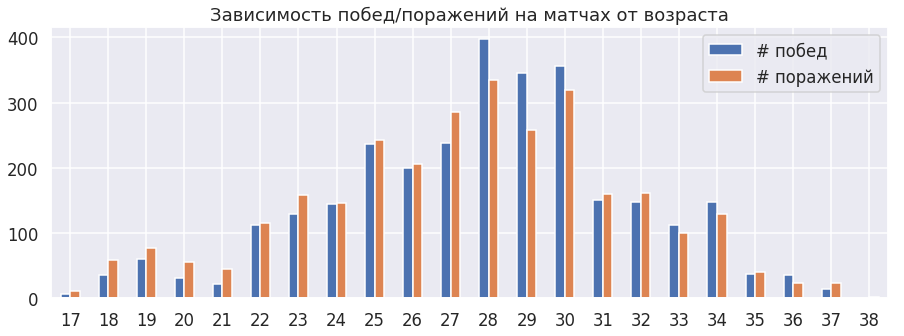

In [189]:
plt.figure(figsize=(10,9))
dftmp.plot(kind='bar', rot=False, figsize=(15,5))
plt.title('Зависимость побед/поражений на матчах от возраста')
plt.show()

<Figure size 576x504 with 0 Axes>

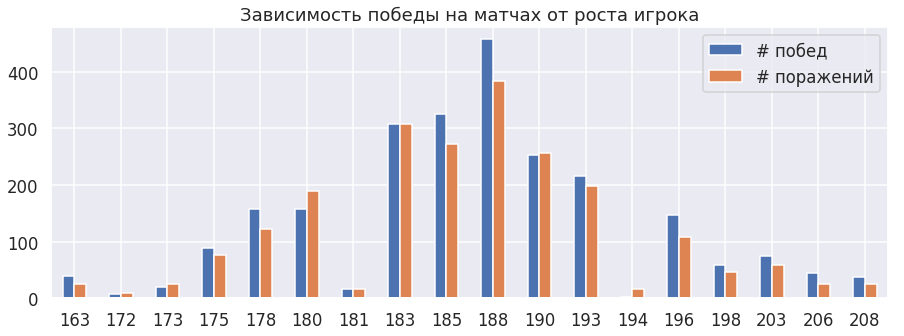

In [192]:
dftmp = pd.DataFrame({'# побед': dft.round({'winner_ht': 0}).query('winner_ht>15')['winner_ht'].value_counts(),
              '# поражений': dft.round({'loser_ht': 0}).query('loser_ht>15')['loser_ht'].value_counts()})
dftmp.index = dftmp.index.astype(int)
plt.figure(figsize=(8,7))
dftmp.plot(kind='bar', rot=False, figsize=(15,5))
plt.title('Зависимость победы на матчах от роста игрока')
plt.show()

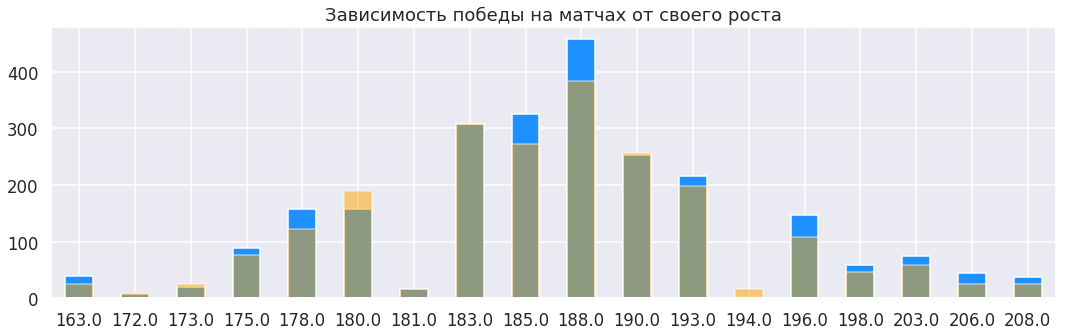

In [146]:
plt.figure(figsize=(18,5))
dft.round({'winner_ht': 0}).query('winner_ht>150')['winner_ht'].value_counts().sort_index().plot('bar', rot=False, color='dodgerblue')
dft.round({'loser_ht': 0}).query('loser_ht>150')['loser_ht'].value_counts().sort_index().plot('bar', alpha=0.5, rot=False, color='orange')
plt.title('Зависимость победы на матчах от своего роста')
plt.show()

In [52]:
dft.iloc[163]

tourney_id                   2015-5014
tourney_name          Shanghai Masters
surface                           Hard
draw_size                           56
tourney_level                        M
tourney_date                  20151011
match_num                           24
winner_id                       105077
winner_seed                        NaN
winner_entry                         Q
winner_name               Albert Ramos
winner_hand                          L
winner_ht                          188
winner_ioc                         ESP
winner_age                     27.7344
winner_rank                         70
winner_rank_points                 703
loser_id                        105023
loser_seed                         NaN
loser_entry                        NaN
loser_name                 Sam Querrey
loser_hand                           R
loser_ht                           198
loser_ioc                          USA
loser_age                      28.0137
loser_rank               

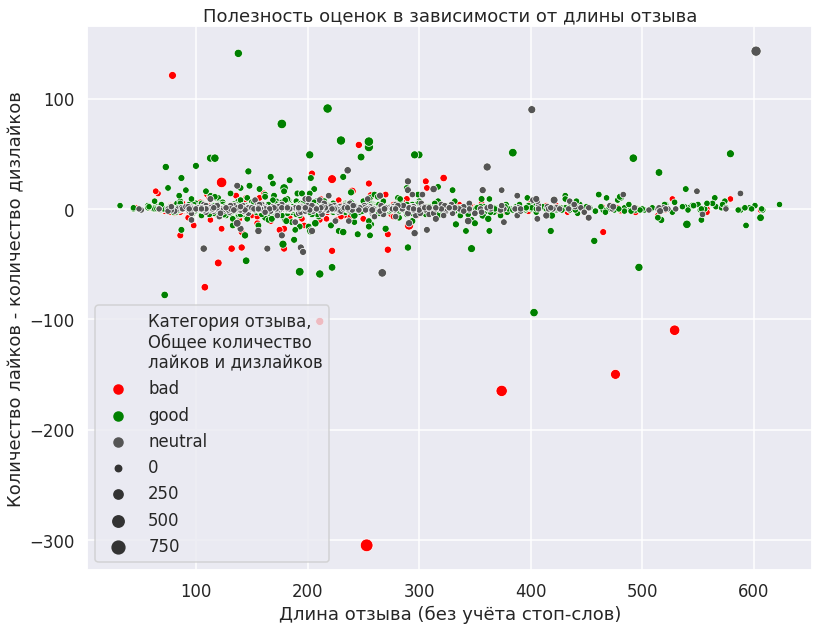

In [50]:
plt.figure(figsize=(13, 10))
g = sns.scatterplot(data=df, y=df['useful'] - df['not_useful'], x='len', hue='cat', size=df['useful'] + df['not_useful'], 
                    palette=sns.color_palette(['red', 'green', '#555555' ]))
plt.title('Полезность оценок в зависимости от длины отзыва')
plt.xlabel('Длина отзыва (без учёта стоп-слов)')
plt.ylabel('Количество лайков - количество дизлайков')
g.legend_.texts[0].set_text('Категория отзыва,\nОбщее количество\nлайков и дизлайков')
plt.show()

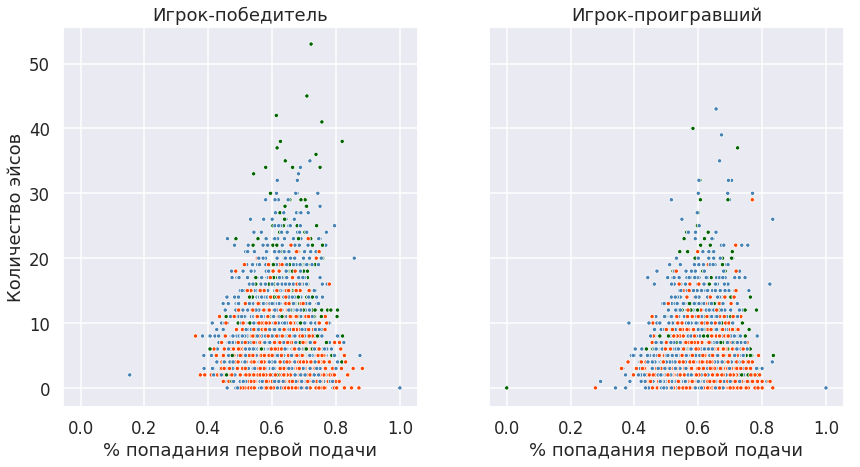

In [59]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
sns.scatterplot(data = dft, y='w_ace', x='w_p_1stIn', alpha=1, s=18, ax=ax[0], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
sns.scatterplot(data = dft, y='l_ace', x='l_p_1stIn', alpha=1, s=18, ax=ax[1], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
ax[0].set_xlabel('% попадания первой подачи')
ax[1].set_xlabel('% попадания первой подачи')
ax[0].set_ylabel('Количество эйсов')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

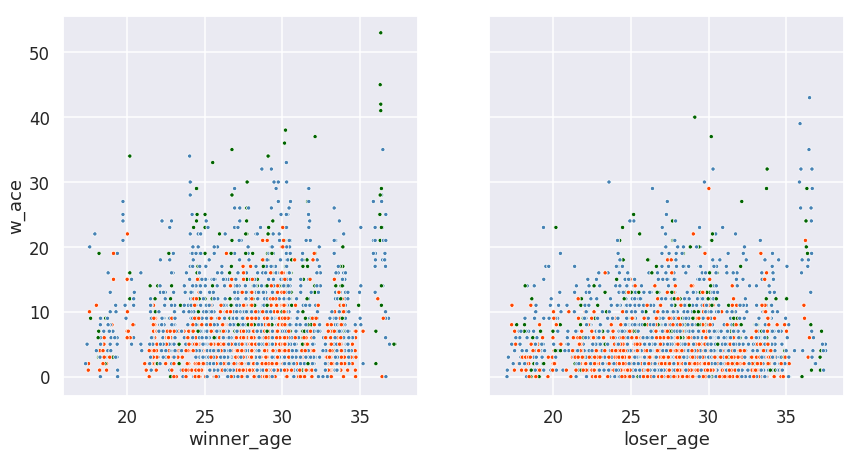

In [62]:


fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
sns.scatterplot(data = dft, y='w_ace', x='winner_age', alpha=1, s=18, ax=ax[0], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
sns.scatterplot(data = dft, y='l_ace', x='loser_age', alpha=1, s=18, ax=ax[1], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))

plt.show()

In [141]:
dft.round({'winner_ht': 0}).query('winner_ht>0')['winner_ht'].value_counts()

188.0    457
185.0    325
183.0    307
190.0    253
193.0    216
180.0    158
178.0    157
196.0    147
175.0     89
203.0     74
198.0     58
206.0     45
163.0     39
208.0     38
173.0     20
181.0     17
172.0      8
194.0      3
Name: winner_ht, dtype: int64

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,7))
# plt.figure()
sns.scatterplot(data = dft, x='winner_hand', y='w_p_1stWon', alpha=1, s=18, ax=ax[0], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
sns.scatterplot(data = dft, x='l_p_1stIn', y='l_p_1stWon', alpha=0.76, s=20, ax=ax[1], legend=False, hue='surface',
               palette=sns.color_palette(['steelblue', 'orangered', 'darkgreen' ]))
ax[0].set_xlim((0.35, 0.9))
ax[0].set_ylim((0.25, 1.05))
ax[0].set_xlabel('% попадания первой подачи')
ax[1].set_xlabel('% попадания первой подачи')
ax[0].set_ylabel('% выигранных первых подач')
ax[0].set_title('Игрок-победитель')
ax[1].set_title('Игрок-проигравший')
plt.show()

In [154]:
dft['winner_hand'].value_counts()

R    2444
L     405
U     104
Name: winner_hand, dtype: int64

In [155]:
dft['loser_hand'].value_counts()

R    2342
L     431
U     179
Name: loser_hand, dtype: int64

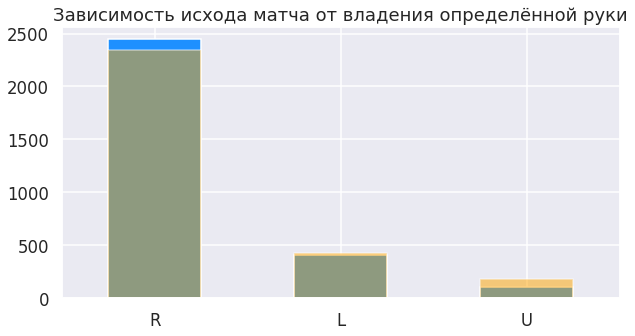

In [157]:
plt.figure(figsize=(10,5))
dft['winner_hand'].value_counts().plot('bar', rot=False, color='dodgerblue')
dft['loser_hand'].value_counts().plot('bar', alpha=0.5, rot=False, color='orange')
plt.title('Зависимость исхода матча от владения определённой руки')
plt.show()

In [158]:
def count_first_lose_sets():
    return score.count(' ')+1

dft['sets'] = dft['score'].apply(count_sets)

In [159]:
dft['sets']

0       2
1       3
2       3
3       3
4       2
5       2
6       3
7       2
8       3
9       2
10      3
11      2
12      3
13      3
14      2
15      3
16      3
17      3
18      2
19      2
20      3
21      2
22      2
23      2
24      2
25      2
26      3
27      3
28      2
29      3
       ..
2928    2
2929    3
2930    3
2931    3
2932    5
2933    3
2934    3
2935    2
2936    3
2937    3
2938    3
2939    2
2940    5
2941    3
2942    4
2943    5
2944    3
2945    3
2946    3
2947    4
2948    3
2949    3
2950    2
2951    4
2952    3
2953    4
2954    3
2955    4
2956    3
2957    3
Name: sets, Length: 2958, dtype: int64